# Restaurant Food Cost

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df_train = pd.read_excel(r"C:\Users\HP\Downloads\Data_Train.xlsx")
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
df_train.shape

(12690, 9)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [5]:
import re
df_train["VOTES"] = df_train["VOTES"].str.replace("votes",'')
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300


In [6]:
df_train['CITY'].fillna("Not Present",inplace=True)
df_train['LOCALITY'].fillna("Not Present",inplace=True)

df_train['RATING'].replace("-",0.,inplace=True)
df_train['RATING'].replace("NEW",0.,inplace=True)

df_train['RATING'].fillna(df_train['RATING'].median(),inplace=True)
df_train['VOTES'].fillna(df_train['VOTES'].median(),inplace=True)

df_train.drop("RESTAURANT_ID",axis=1,inplace=True)
df_train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300


In [7]:
df_train['RATING']=df_train['RATING'].astype("float")
df_train['VOTES']=df_train['VOTES'].astype("int")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12690 non-null  object 
 1   CUISINES  12690 non-null  object 
 2   TIME      12690 non-null  object 
 3   CITY      12690 non-null  object 
 4   LOCALITY  12690 non-null  object 
 5   RATING    12690 non-null  float64
 6   VOTES     12690 non-null  int32  
 7   COST      12690 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 743.7+ KB


In [8]:
df_train.describe()

,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000
mean,3.426895,391.696217,655.252246
std,1.179023,805.157717,627.003540
min,0.000000,4.000000,20.000000
25%,3.400000,64.000000,300.000000
50%,3.800000,163.000000,500.000000
75%,4.000000,405.000000,800.000000
max,4.900000,41186.000000,14000.000000


In [9]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [10]:
lb = LabelEncoder()

In [11]:
col =  df_train.select_dtypes(include=['object']).columns.tolist()
for i in col:
    lb.fit(df_train[i])
    df_train[i] = lb.transform(df_train[i])

In [12]:
df_train.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,739,321,285,3.6,49,1200
1,33,289,1885,67,1047,4.2,30,1500
2,31,2976,661,67,1102,3.8,221,800
3,95,4130,275,222,136,4.1,24,800
4,50,1766,615,222,620,3.8,165,300


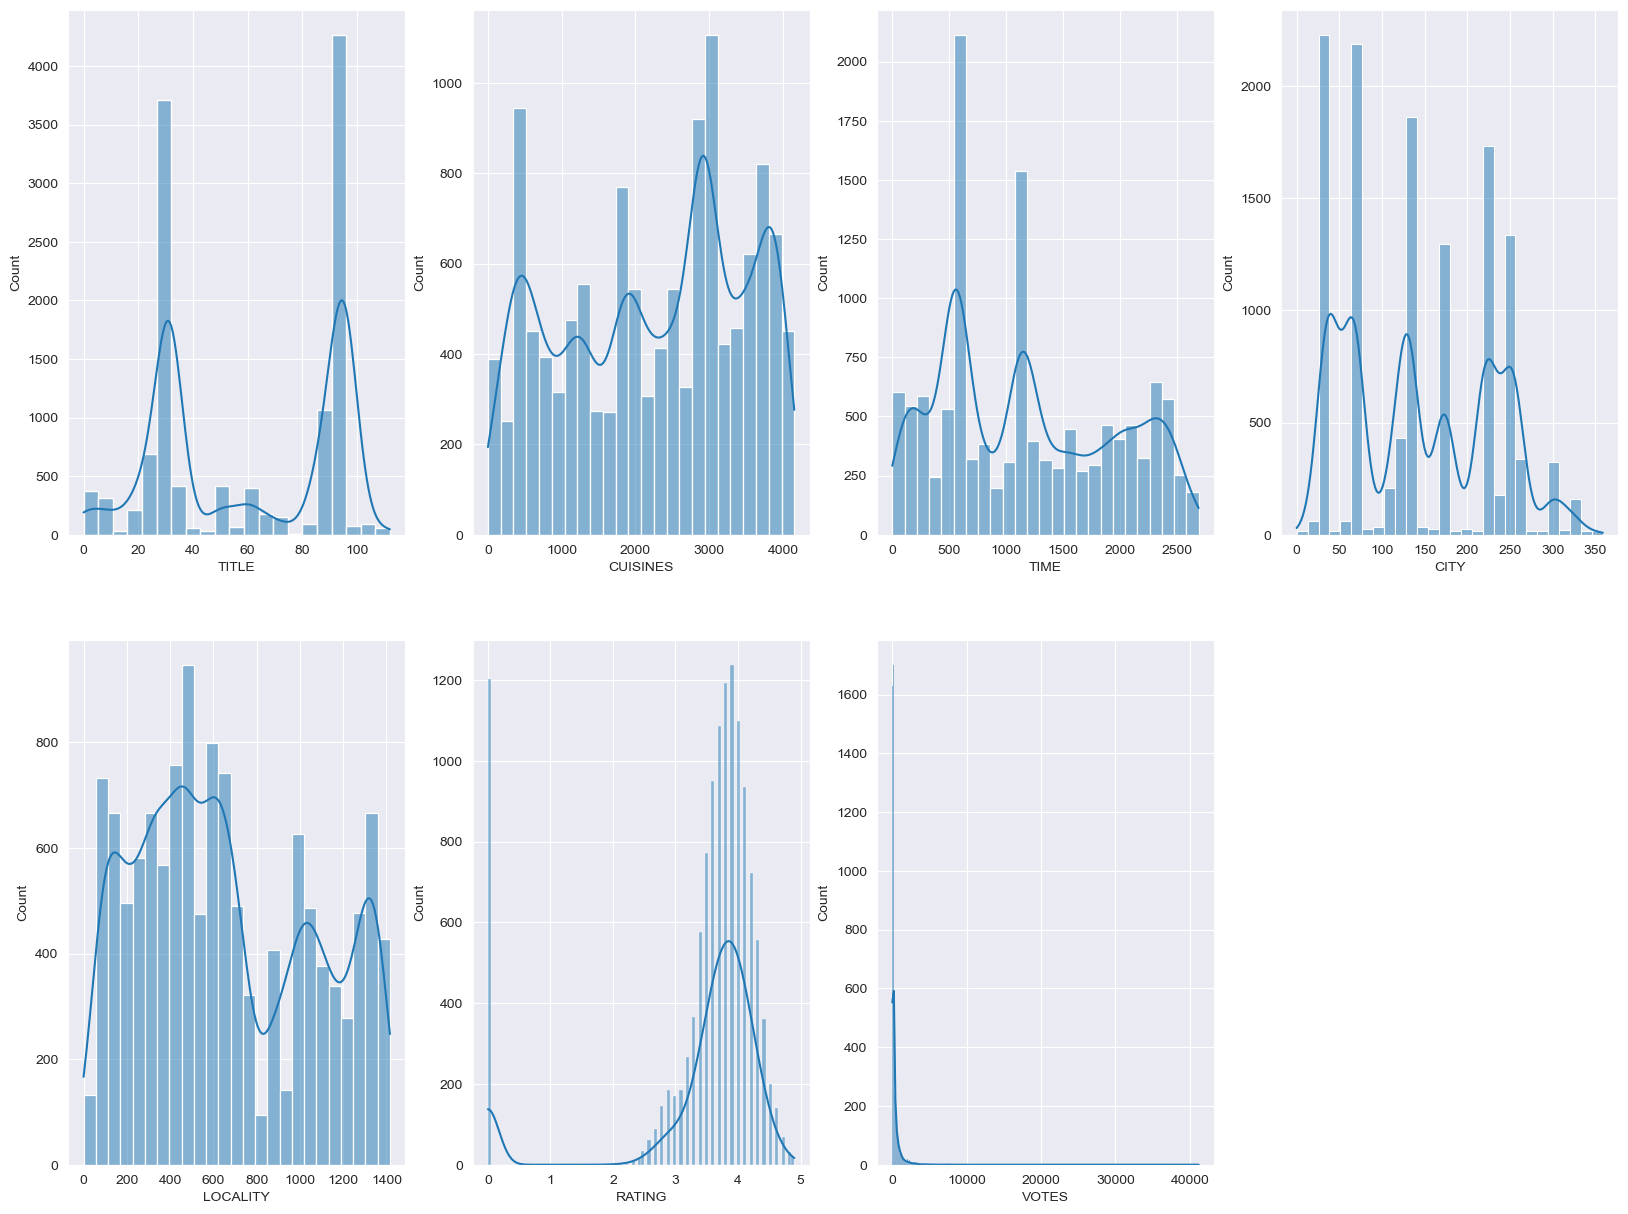

In [13]:
plt.figure(figsize=(20,15))
num = 1

for i in df_train.drop("COST",axis=1):
    if num<10:
        ax = plt.subplot(2,4,num)
        sns.histplot(df_train[i],kde=True)
        plt.xlabel(i)
    num+=1
plt.show()

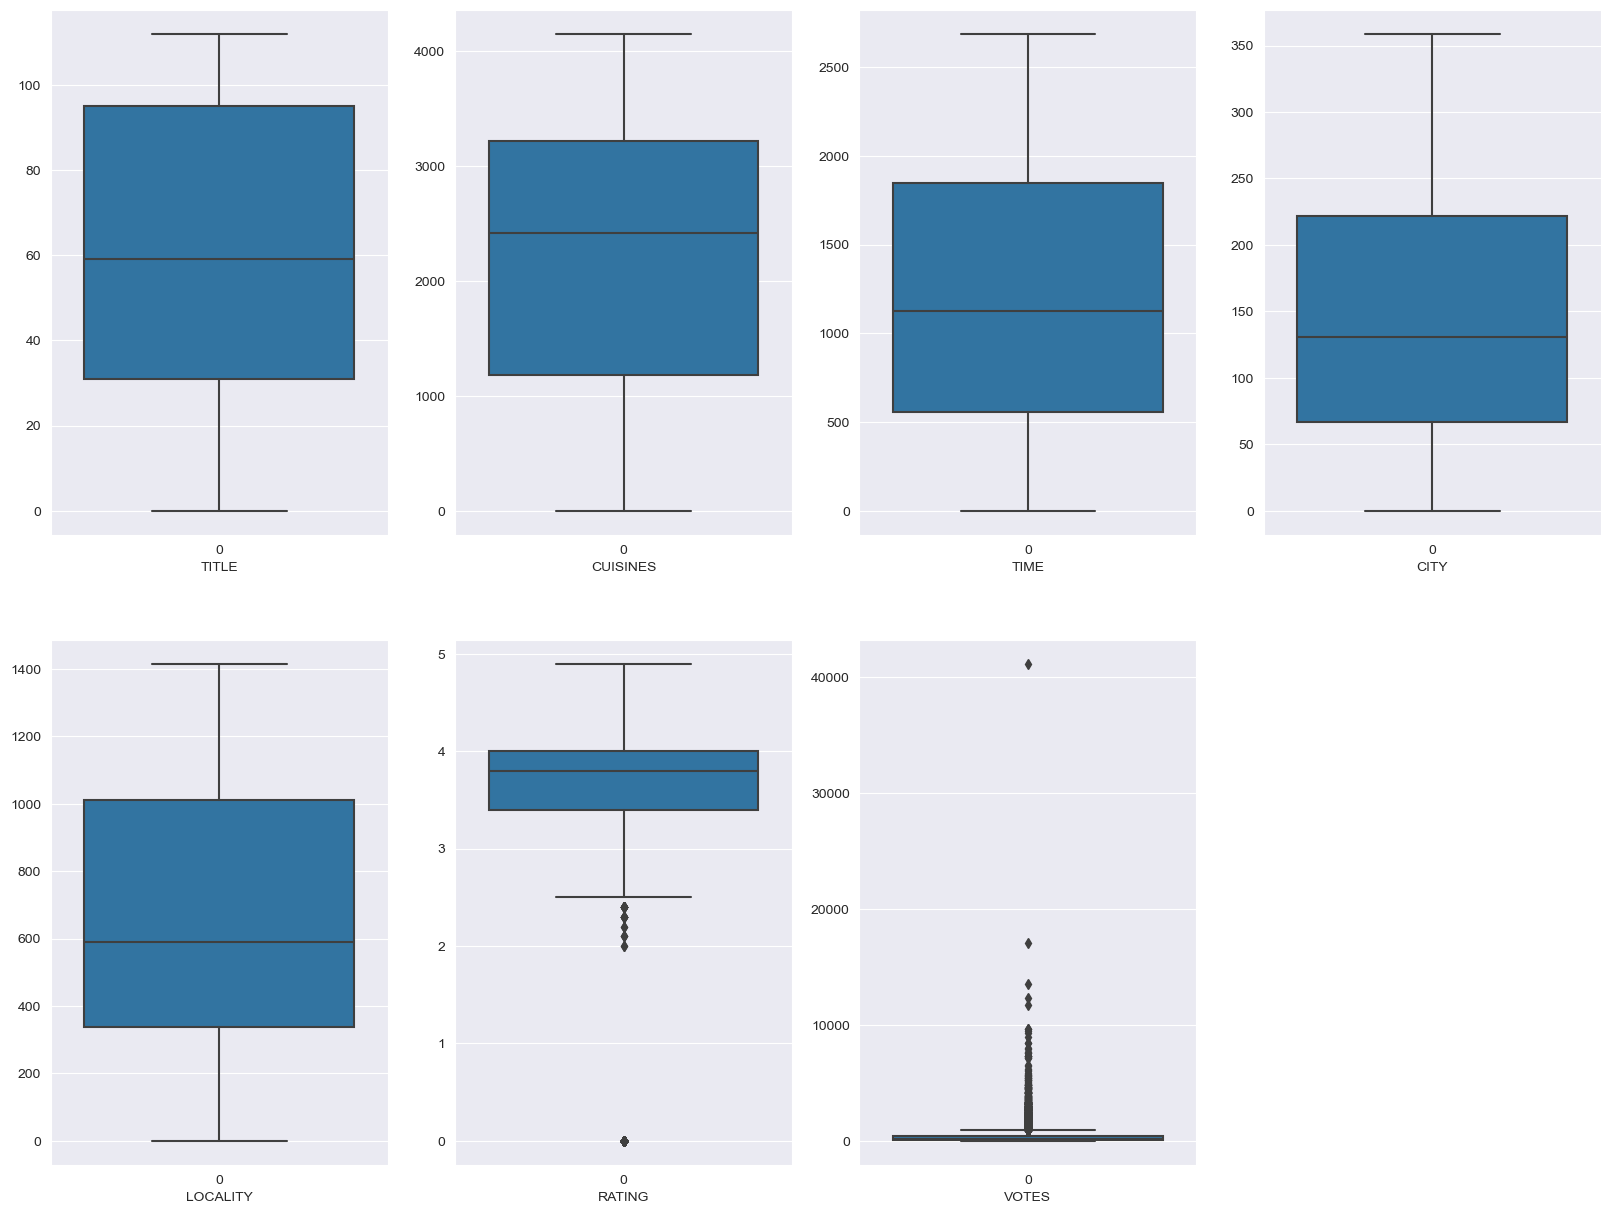

In [14]:
plt.figure(figsize=(20,15))
num = 1

for i in df_train.drop("COST",axis=1):
    if num<10:
        ax = plt.subplot(2,4,num)
        sns.boxplot(df_train[i])
        plt.xlabel(i)
    num+=1
plt.show()

In [15]:
from scipy.stats import zscore

In [16]:
z=np.abs(zscore(df_train.drop("COST",axis=1)))
z.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,0.868887,0.325408,0.584658,2.096727,0.931962,0.146826,0.425643
1,0.807839,1.616381,0.934369,0.912505,0.977361,0.655742,0.449242
2,0.868887,0.615265,0.688048,0.912505,1.115173,0.316465,0.212012
3,1.084647,1.573701,1.199692,0.923837,1.305308,0.570923,0.456694
4,0.288931,0.389682,0.749021,0.923837,0.092561,0.316465,0.281566


In [17]:
np.where(z>3)

(array([  186,   196,   293,   303,   304,   344,   354,   431,   510,
          775,   796,   852,   855,   872,   913,  1034,  1038,  1132,
         1147,  1151,  1244,  1346,  1467,  1476,  1522,  1540,  1617,
         1681,  1685,  1850,  2090,  2204,  2268,  2302,  2305,  2412,
         2886,  2905,  2977,  3028,  3033,  3289,  3333,  3398,  3408,
         3507,  3578,  3587,  3706,  3728,  3841,  3855,  3877,  3909,
         3952,  3974,  3987,  4124,  4150,  4192,  4193,  4268,  4367,
         4470,  4512,  4557,  4578,  4592,  4618,  4628,  4634,  4647,
         4658,  4691,  4709,  4760,  4768,  4855,  4947,  4987,  5078,
         5140,  5257,  5375,  5492,  5502,  5594,  5629,  5662,  5774,
         5792,  5836,  5880,  5897,  5969,  5996,  6005,  6142,  6390,
         6421,  6446,  6448,  6472,  6496,  6506,  6519,  6608,  6649,
         6684,  6690,  6714,  6760,  6878,  6922,  6982,  7028,  7034,
         7059,  7189,  7202,  7262,  7459,  7494,  7626,  7988,  7997,
      

In [18]:
print(z.iloc[186,6])
print(z.iloc[196,6])

5.075359411431477
16.281058998909117


In [19]:
df_train = df_train[(z<3).all(axis=1)]
df_train.shape

(12487, 8)

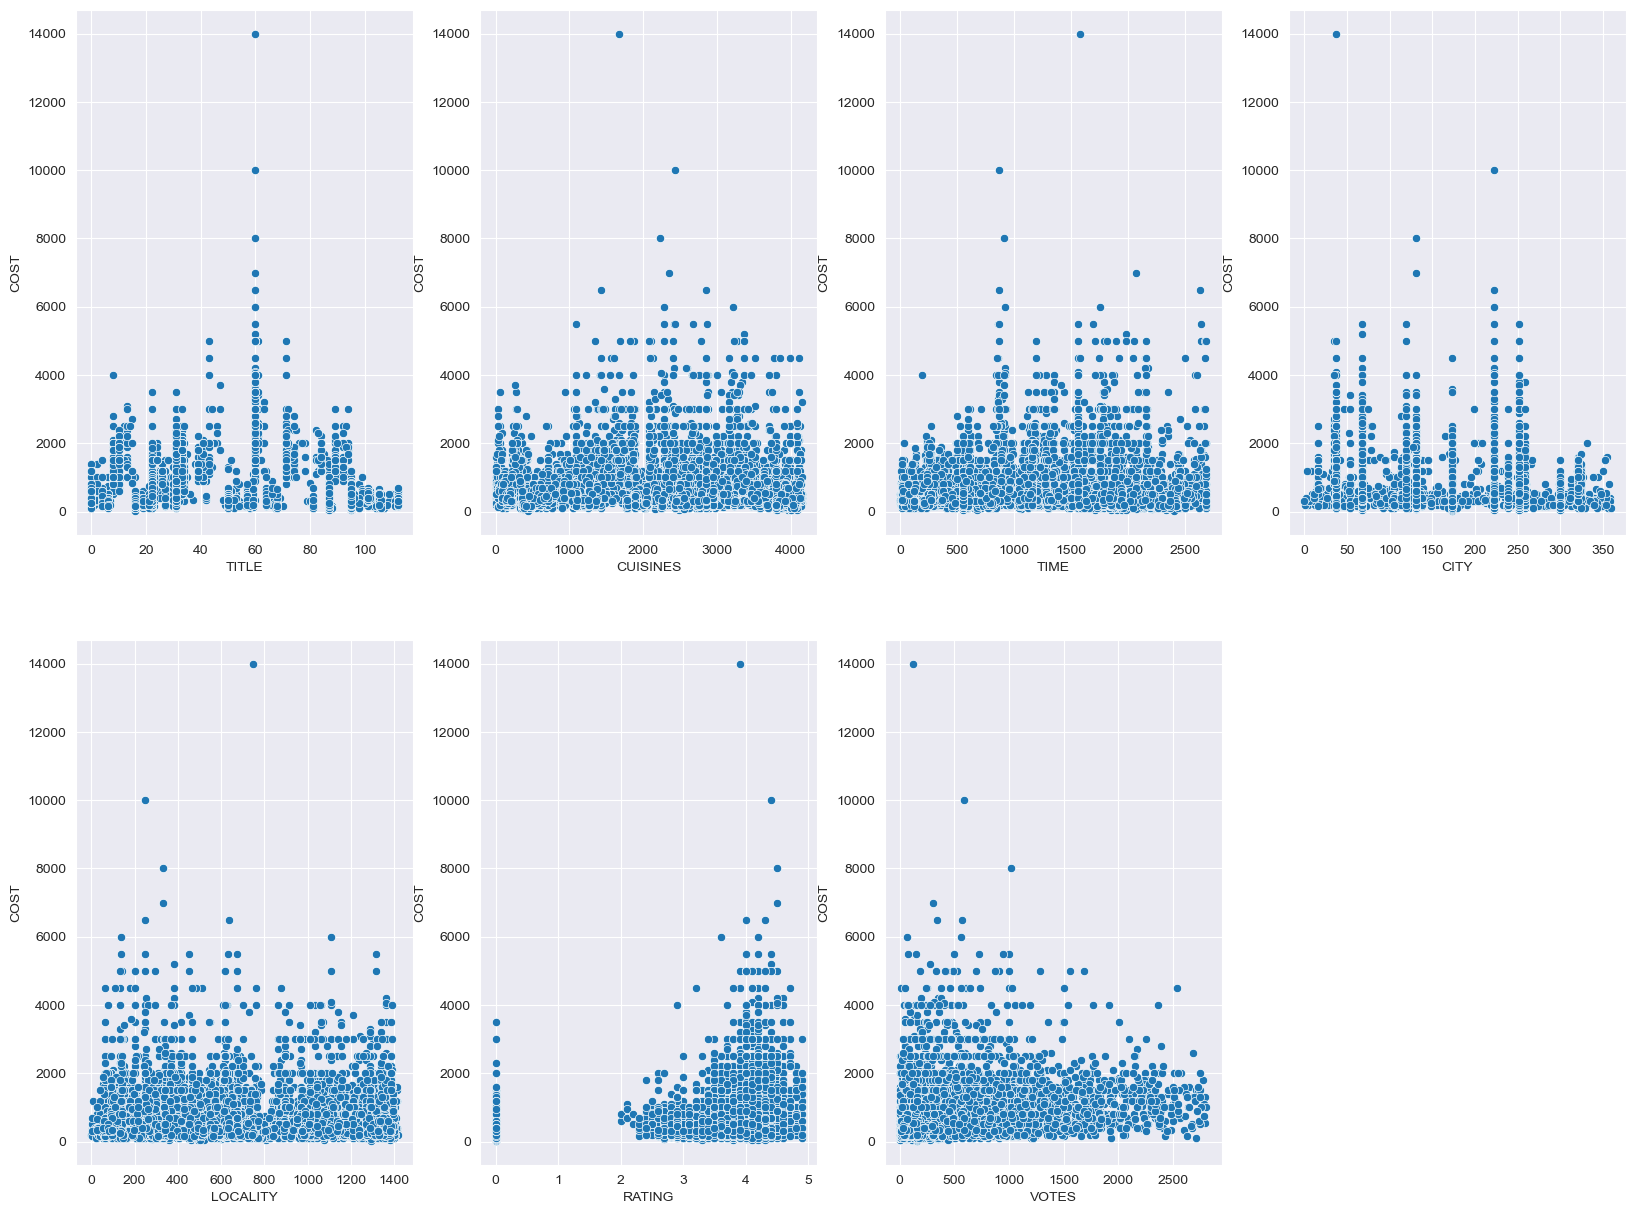

In [20]:
plt.figure(figsize=(20,15))
num = 1

for i in df_train.drop("COST",axis=1):
    if num<10:
        ax = plt.subplot(2,4,num)
        sns.scatterplot(x=df_train[i],y=df_train["COST"])
        plt.xlabel(i)
    num+=1
plt.show()

In [21]:
x = df_train.iloc[:,:-1]
x.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,31,2627,739,321,285,3.6,49
1,33,289,1885,67,1047,4.2,30
2,31,2976,661,67,1102,3.8,221
3,95,4130,275,222,136,4.1,24
4,50,1766,615,222,620,3.8,165


In [22]:
y = df_train.iloc[:,-1]
y.head()

0    1200
1    1500
2     800
3     800
4     300
Name: COST, dtype: int64

<Axes: >

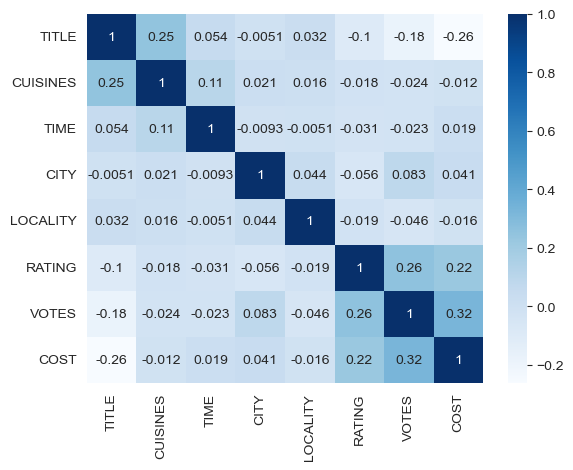

In [23]:
sns.heatmap(df_train.corr(),annot=True,cmap="Blues")

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
print("x_train :",x_train.shape)
print('x_test :',x_test.shape)
print("y_train :",y_train.shape)
print('y_test :',y_test.shape)

x_train : (9989, 7)
x_test : (2498, 7)
y_train : (9989,)
y_test : (2498,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [27]:
lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
print(lr.coef_)
print(lr.intercept_)

[-4.07292122e+00  2.47454707e-02  3.20113267e-02  1.60887554e-01
  1.43475483e-02  7.38869167e+01  3.50117295e-01]
397.57448540938475


In [29]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [30]:
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: 0.16762347909303232
mean_absolute_error: 322.21597976568876
mean_squared_error: 325602.32608168444
root_mean_squared_error: 570.6157429318652


In [31]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:" ,mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.18352878907228054
mean_absolute_error: 320.8389803805717
mean_squared_error: 301303.7296962575
root_mean_squared_error: 548.9114042322836


In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dtr =DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [34]:
y_train_pred = dtr.predict(x_train)
y_test_pred = dtr.predict(x_test)

In [35]:
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: 0.999992322292472
mean_absolute_error: 0.06006607267994794
mean_squared_error: 3.003303633997397
root_mean_squared_error: 1.733004222152213


In [36]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:" ,mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.47927573793078015
mean_absolute_error: 256.455164131305
mean_squared_error: 192163.74099279425
root_mean_squared_error: 438.3648491756544


In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf =RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [40]:
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: 0.9593188005050806
mean_absolute_error: 69.5339773036054
mean_squared_error: 15913.343121338818
root_mean_squared_error: 126.148099951362


In [41]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:" ,mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.7389866083192301
mean_absolute_error: 185.79817015517176
mean_squared_error: 96322.20629644256
root_mean_squared_error: 310.3581903163546


In [42]:
from sklearn.svm import SVR

In [43]:
svr =SVR()
svr.fit(x_train,y_train)

SVR()

In [44]:
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)

In [45]:
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: -0.008759553813223686
mean_absolute_error: 327.6265403532787
mean_squared_error: 394598.41661658086
root_mean_squared_error: 628.1706906698058


In [46]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:" ,mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: -0.012876873531617816
mean_absolute_error: 331.84964364713807
mean_squared_error: 373783.6382147444
root_mean_squared_error: 611.3784737907807


In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
knn =KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [49]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [50]:
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: 0.4674310675930319
mean_absolute_error: 254.80923015316847
mean_squared_error: 208326.0145319852
root_mean_squared_error: 456.4274471720398


In [51]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:" ,mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.15352445172213125
mean_absolute_error: 324.3898318654924
mean_squared_error: 312376.28024019214
root_mean_squared_error: 558.9063251030464


In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
parm_grid={
    "n_estimators" : [50,100,150,200],
    "max_depth" : [10,12,14,16,18,20],
    "max_features": ['sqrt', 'log2', None]
}

In [54]:
rf_cv = GridSearchCV(estimator=rf,param_grid=parm_grid,cv=5,scoring='neg_mean_squared_error',verbose=1)

In [55]:
rf_cv.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 14, 16, 18, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [56]:
rf_cv.best_params_

{'max_depth': 20, 'max_features': None, 'n_estimators': 150}

In [57]:
y_train_pred = rf_cv.predict(x_train)
y_test_pred = rf_cv.predict(x_test)

In [58]:
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: 0.950270747899053
mean_absolute_error: 83.09452638851019
mean_squared_error: 19452.68727754106
root_mean_squared_error: 139.47289083381423


In [59]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:" ,mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.7412745416337339
mean_absolute_error: 184.94137954624452
mean_squared_error: 95477.88645793534
root_mean_squared_error: 308.99496186497174


In [60]:
x_new = pd.read_excel(r"C:\Users\HP\Downloads\Data_Test.xlsx")
x_new.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [61]:
x_new.shape

(4231, 8)

In [62]:
x_new.drop("RESTAURANT_ID",axis=1,inplace=True)

In [63]:
x_new.shape

(4231, 7)

In [64]:
x_new["VOTES"] = x_new["VOTES"].str.replace("votes","")

In [65]:
x_new['CITY'].fillna("Not Present",inplace=True)
x_new['LOCALITY'].fillna("Not Present",inplace=True)

x_new['RATING'].replace("-",0.,inplace=True)
x_new['RATING'].replace("NEW",0.,inplace=True)

x_new['RATING'].fillna(0,inplace=True)
x_new['VOTES'].fillna(0,inplace=True)
x_new.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350
3,None,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445
4,QUICK BITES,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23


In [66]:
x_new['RATING'] = x_new['RATING'].astype("float")
x_new['VOTES'] = x_new['VOTES'].astype("int")

In [67]:
col =  x_new.select_dtypes(include=['object']).columns.tolist()
for i in col:
    x_new[i] = lb.fit_transform(x_new[i])

In [68]:
x_new.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,1293,503,110,663,4.3,564
1,75,1632,933,96,221,4.2,61
2,23,1455,219,96,411,3.8,350
3,66,208,1071,41,456,3.8,1445
4,75,1637,208,78,300,3.6,23


In [69]:
y_new=rf_cv.predict(x_new)
y_new

array([ 910.75589349, 1835.33333333,  611.20549115, ..., 1840.66666667,
       1583.        , 1844.        ])